# 4   Writing Structured Programs

By now you will have a sense of the capabilities of the Python programming language for processing natural language. However, if you're new to Python or to programming, you may still be wrestling with Python and not feel like you are in full control yet. In this chapter we'll address the following questions:

1.    How can you write well-structured, readable programs that you and others will be able to re-use easily?
2.    How do the fundamental building blocks work, such as loops, functions and assignment?
3.    What are some of the pitfalls with Python programming and how can you avoid them?

Along the way, you will consolidate your knowledge of fundamental programming constructs, learn more about using features of the Python language in a natural and concise way, and learn some useful techniques in visualizing natural language data. As before, this chapter contains many examples and exercises (and as before, some exercises introduce new material). 

In the other chapters of this book, we have organized the programming concepts as dictated by the needs of NLP. Here we revert to a more conventional approach where the material is more closely tied to the structure of the programming language. There's not room for a complete presentation of the language, so we'll just focus on the language constructs and idioms that are most important for NLP.

## 4.1   Back to the Basics

### Assignment

Assignment would seem to be the most elementary programming concept, not deserving a separate discussion. However, there are some surprising subtleties here. Consider the following code fragment:

In [53]:
foo = 'Monty'
bar = foo
foo = 'Python'
bar

'Monty'

This behaves exactly as expected. When we write `bar = foo` in the above code, the value of `foo` (the string `'Monty'`) is assigned to `bar`. That is, `bar` is a **copy** of `foo`, so when we overwrite `foo` with a new string `'Python'`, the value of `bar` is not affected.

However, assignment statements do not always involve making copies in this way. Assignment always copies the value of an expression, but a value is not always what you might expect it to be. In particular, the "value" of a structured object such as a list is actually just a *reference* to the object. In the following example, the first line assigns the reference of `foo` to the new variable `bar`. Now when we modify something inside `foo`, we can see that the contents of `bar` have also been changed.

In [2]:
foo = ['Monty', 'Python']
bar = foo
foo[1] = 'Bodkin'
bar

['Monty', 'Bodkin']

<img src='images/array-memory.png' width='500' />

*List Assignment and Computer Memory: Two list objects `foo` and `bar` reference the same location in the computer's memory; updating `foo` will also modify `bar`, and vice versa.*

The line `bar = foo` does not copy the contents of the variable, only its "object reference". To understand what is going on here, we need to know how lists are stored in the computer's memory. In the above figure, we see that a list `foo` is a reference to an object stored at location 3133 (which is itself a series of pointers to other locations holding strings). When we assign `bar = foo`, it is just the object reference 3133 that gets copied. This behavior extends to other aspects of the language, such as parameter passing (see Section 4.4).

Let's experiment some more, by creating a variable `empty` holding the empty list, then using it three times on the next line.

In [48]:
empty = []
nested = [empty, empty, empty]
nested

[[], [], []]

In [49]:
nested[1].append('Python')
nested

[['Python'], ['Python'], ['Python']]

Observe that changing one of the items inside our nested list of lists changed them all. This is because each of the three elements is actually just a reference to one and the same list in memory.

Now, notice that when we assign a new value to one of the elements of the list, it does not propagate to the others:

In [12]:
nested = [[]] * 3
nested[1].append('Python')
nested[1] = ['Monty']
nested

[['Python'], ['Monty'], ['Python']]

We began with a list containing three references to a single empty list object. Then we modified that object by appending `'Python'` to it, resulting in a list containing three references to a single list object `['Python']`. Next, we overwrote one of those references with a reference to a new object `['Monty']`. This last step modified one of the three object references inside the nested list. However, the `['Python']` object wasn't changed, and is still referenced from two places in our nested list of lists. It is crucial to appreciate this difference between modifying an object via an object reference, and overwriting an object reference.

### Equality

Python provides two ways to check that a pair of items are the same. The `is` operator tests for object identity. We can use it to verify our earlier observations about objects. First we create a list containing several copies of the same object, and demonstrate that they are not only identical according to `==`, but also that they are one and the same object:

In [13]:
size = 5
python = ['Python']
snake_nest = [python] * size
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [14]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

Now let's put a new python in this nest. We can easily show that the objects are not all identical:

In [18]:
import random
position = random.choice(range(size))
snake_nest[position] = ['Python']
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [19]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [20]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

You can do several pairwise tests to discover which position contains the interloper, but the `id()` function makes detection easier:

In [21]:
[id(snake) for snake in snake_nest]

[1822713098688, 1822772286784, 1822713098688, 1822713098688, 1822713098688]

This reveals the item of the list having a distinct identifier. 

Having two kinds of equality might seem strange. However, it's really just the type-token distinction, familiar from natural language, here showing up in a programming language.

### Conditionals

In the condition part of an `if` statement, a nonempty string or list is evaluated as true, while an empty string or list evaluates as false.

In [22]:
mixed = ['cat', '', ['dog'], []]
for element in mixed:
    if element:
        print(element)

cat
['dog']


That is, we *don't* need to say `if len(element) > 0:` in the condition.

What's the difference between using `if...elif` as opposed to using a couple of `if` statements in a row? Well, consider the following situation:

In [23]:
animals = ['cat', 'dog']
if 'cat' in animals:
    print(1)
elif 'dog' in animals:
    print(2)

1


Since the `if` clause of the statement is satisfied, Python never tries to evaluate the `elif` clause, so we never get to print out `2`. By contrast, if we replaced the `elif` by an `if`, then we would print out both `1` and `2`. So an `elif` clause potentially gives us more information than a bare `if` clause; when it evaluates to true, it tells us not only that the condition is satisfied, but also that the condition of the main `if` clause was not satisfied.

The functions `all()` and `any()` can be applied to a list (or other sequence) to check whether all or any items meet some condition:

In [24]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
all(len(w) > 4 for w in sent)

False

In [25]:
any(len(w) > 4 for w in sent)

True

## 4.2   Sequences

So far, we have seen two kinds of sequence object: strings and lists. Another kind of sequence is called a **tuple**. Tuples are formed with the comma operator, and typically enclosed using parentheses. We've actually seen them in the previous chapters, and sometimes referred to them as "pairs", since there were always two members. However, tuples can have any number of members. Like lists and strings, tuples can be indexed and sliced, and have a length.

In [26]:
t = 'walk', 'fem', 3
t

('walk', 'fem', 3)

In [27]:
t[0]

'walk'

In [28]:
t[1:]

('fem', 3)

In [29]:
len(t)

3

Let's compare strings, lists and tuples directly, and do the indexing, slice, and length operation on each type:

In [30]:
raw = 'I turned off the spectroroute'
text = ['I', 'turned', 'off', 'the', 'spectroroute']
pair = (6, 'turned')
raw[2], text[3], pair[1]

('t', 'the', 'turned')

In [31]:
raw[-3:], text[-3:], pair[-3:]

('ute', ['off', 'the', 'spectroroute'], (6, 'turned'))

In [32]:
len(raw), len(text), len(pair)

(29, 5, 2)

Notice in this code sample that we computed multiple values on a single line, separated by commas. These comma-separated expressions are actually just tuples — Python allows us to omit the parentheses around tuples if there is no ambiguity. When we print a tuple, the parentheses are always displayed. By using tuples in this way, we are implicitly aggregating items together.

### Operating on Sequence Types

We can iterate over the items in a sequence `s` in a variety of useful ways:

*Various ways to iterate over sequences*

|Python Expression| 	Comment|
|:-|:-|
|`for item in s`| 	iterate over the items of `s`|
|`for item in sorted(s)`| 	iterate over the items of `s` in order|
|`for item in set(s)`| 	iterate over unique elements of `s`|
|`for item in reversed(s)`| 	iterate over elements of `s` in reverse|
|`for item in set(s).difference(t)`| 	iterate over elements of `s` not in `t`|

The sequence functions can be combined in various ways; for example, to get unique elements of `s` sorted in reverse, use `reversed(sorted(set(s)))`. We can randomize the contents of a list `s` before iterating over them, using `random.shuffle(s)`.

We can convert between these sequence types. For example, `tuple(s)` converts any kind of sequence into a tuple, and `list(s)` converts any kind of sequence into a list. We can convert a list of strings to a single string using the `join()` function, e.g. `':'.join(words)`.

Some other objects, such as a `FreqDist`, can be converted into a sequence (using `list()` or `sorted()`) and support iteration, e.g.:

In [33]:
import nltk
from nltk import word_tokenize
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = word_tokenize(raw)
fdist = nltk.FreqDist(text)
sorted(fdist)

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [34]:
for key in fdist:
    print(key + ':', fdist[key], end='; ')

lorry: 4; ,: 3; yellow: 2; Red: 1; red: 1; .: 1; 

In the next example, we use tuples to re-arrange the contents of our list. (We can omit the parentheses because the comma has higher precedence than assignment.)

In [35]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
words[2], words[3], words[4] = words[3], words[4], words[2]
words

['I', 'turned', 'the', 'spectroroute', 'off']

This is an idiomatic and readable way to move items inside a list. It is equivalent to the following traditional way of doing such tasks that does not use tuples (notice that this method needs a temporary variable `tmp`).

In [ ]:
tmp = words[2]
words[2] = words[3]
words[3] = words[4]
words[4] = tmp

As we have seen, Python has sequence functions such as `sorted()` and `reversed()` that rearrange the items of a sequence. There are also functions that modify the *structure* of a sequence and which can be handy for language processing. Thus, `zip()` takes the items of two or more sequences and "zips" them together into a single list of tuples. Given a sequence `s`, `enumerate(s)` returns pairs consisting of an index and the item at that index.

In [36]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
zip(words, tags)

In [37]:
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [38]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

For some NLP tasks it is necessary to cut up a sequence into two or more parts. For instance, we might want to "train" a system on 90% of the data and test it on the remaining 10%. To do this we decide the location where we want to cut the data, then cut the sequence at that location.

In [54]:
text = nltk.corpus.nps_chat.words()
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:]
text == training_data + test_data

True

In [55]:
len(training_data) / len(test_data)

9.0

We can verify that none of the original data is lost during this process, nor is it duplicated. We can also verify that the ratio of the sizes of the two pieces is what we intended.

### Combining Different Sequence Types

Let's combine our knowledge of these three sequence types, together with list comprehensions, to perform the task of sorting the words in a string by their length.

In [56]:
words = 'I turned off the spectroroute'.split() 
wordlens = [(len(word), word) for word in words] 
wordlens.sort() 
' '.join(w for (_, w) in wordlens) 

'I off the turned spectroroute'

Each of the above lines of code contains a significant feature. A simple string is actually an object with methods defined on it such as `split()`. We use a list comprehension to build a list of tuples, where each tuple consists of a number (the word length) and the word, e.g. `(3, 'the')`. We use the `sort()` method to sort the list in-place. Finally, we discard the length information and join the words back into a single string. (The underscore is just a regular Python variable, but we can use underscore by convention to indicate that we will not use its value.)

We began by talking about the commonalities in these sequence types, but the above code illustrates important differences in their roles. First, strings appear at the beginning and the end: this is typical in the context where our program is reading in some text and producing output for us to read. Lists and tuples are used in the middle, but for different purposes. A list is typically a sequence of objects all having the *same type*, of *arbitrary length*. We often use lists to hold sequences of words. In contrast, a tuple is typically a collection of objects of *different types*, of *fixed length*. We often use a tuple to hold a **record**, a collection of different **fields** relating to some entity. This distinction between the use of lists and tuples takes some getting used to, so here is another example:

In [57]:
lexicon = [
    ('the', 'det', ['Di:', 'D@']),
    ('off', 'prep', ['Qf', 'O:f'])
]

Here, a lexicon is represented as a list because it is a collection of objects of a single type — lexical entries — of no predetermined length. An individual entry is represented as a tuple because it is a collection of objects with different interpretations, such as the orthographic form, the part of speech, and the pronunciations (represented in the SAMPA computer-readable phonetic alphabet http://www.phon.ucl.ac.uk/home/sampa/). Note that these pronunciations are stored using a list. (Why?)

The distinction between lists and tuples has been described in terms of usage. However, there is a more fundamental difference: in Python, lists are **mutable**, while tuples are **immutable**. In other words, lists can be modified, while tuples cannot. Here are some of the operations on lists that do in-place modification of the list.

In [58]:
lexicon.sort()
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
del lexicon[0]

### Generator Expressions

We've been making heavy use of list comprehensions, for compact and readable processing of texts. Here's an example where we tokenize and normalize a text:

In [60]:
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
"it means just what I choose it to mean - neither more nor less."'''
[w.lower() for w in word_tokenize(text)]

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 "''",
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''"]

Suppose we now want to process these words further. We can do this by inserting the above expression inside a call to some other function, but Python allows us to omit the brackets.

In [61]:
max([w.lower() for w in word_tokenize(text)])

'word'

In [64]:
max(w.lower() for w in word_tokenize(text))

'word'

The second line uses a **generator expression**. This is more than a notational convenience: in many language processing situations, generator expressions will be more efficient. In the first line, storage for the list object must be allocated before the value of `max()` is computed. If the text is very large, this could be slow. In the second line, the data is streamed to the calling function. Since the calling function simply has to find the maximum value — the word which comes latest in lexicographic sort order — it can process the stream of data without having to store anything more than the maximum value seen so far.

## 4.3   Questions of Style

Programming is as much an art as a science. The undisputed "bible" of programming, a 2,500 page multi-volume work by Donald Knuth, is called *The Art of Computer Programming*. Many books have been written on *Literate Programming*, recognizing that humans, not just computers, must read and understand programs. Here we pick up on some issues of programming style that have important ramifications for the readability of your code, including code layout, procedural vs declarative style, and the use of loop variables.

### Python Coding Style

When writing programs you make many subtle choices about names, spacing, comments, and so on. When you look at code written by other people, needless differences in style make it harder to interpret the code. Therefore, the designers of the Python language have published a style guide for Python code, available at http://www.python.org/dev/peps/pep-0008/. The underlying value presented in the style guide is *consistency*, for the purpose of maximizing the readability of code. We briefly review some of its key recommendations here, and refer readers to the full guide for detailed discussion with examples.

Code layout should use four spaces per indentation level. You should make sure that when you write Python code in a file, you avoid tabs for indentation, since these can be misinterpreted by different text editors and the indentation can be messed up. Lines should be less than 80 characters long; if necessary you can break a line inside parentheses, brackets, or braces, because Python is able to detect that the line continues over to the next line. If you need to break a line outside parentheses, brackets, or braces, you can often add extra parentheses, and you can always add a backslash at the end of the line that is broken:

    if (len(syllables) > 4 and len(syllables[2]) == 3 and
        syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]):
            process(syllables)
    if len(syllables) > 4 and len(syllables[2]) == 3 and \
       syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]:
            process(syllables)

### Procedural vs Declarative Style

We have just seen how the same task can be performed in different ways, with implications for efficiency. Another factor influencing program development is *programming style*. Consider the following program to compute the average length of words in the Brown Corpus:

In [65]:
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)
total / count

4.401545438271973

In this program we use the variable `count` to keep track of the number of tokens seen, and `total` to store the combined length of all words. This is a low-level style, not far removed from machine code, the primitive operations performed by the computer's CPU. The two variables are just like a CPU's registers, accumulating values at many intermediate stages, values that are meaningless until the end. We say that this program is written in a *procedural* style, dictating the machine operations step by step. Now consider the following program that computes the same thing:

In [66]:
total = sum(len(t) for t in tokens)
print(total / len(tokens))

4.401545438271973


The first line uses a generator expression to sum the token lengths, while the second line computes the average as before. Each line of code performs a complete, meaningful task, which can be understood in terms of high-level properties like: "`total` is the sum of the lengths of the tokens". Implementation details are left to the Python interpreter. The second program uses a built-in function, and constitutes programming at a more abstract level; the resulting code is more declarative. Let's look at an extreme example:

    word_list = []
    i = 0
    while i < len(tokens):
        j = 0
        while j < len(word_list) and word_list[j] <= tokens[i]:
            j += 1
        if j == 0 or tokens[i] != word_list[j-1]:
            word_list.insert(j, tokens[i])
        i += 1

The equivalent declarative version uses familiar built-in functions, and its purpose is instantly recognizable:

    word_list = sorted(set(tokens))

Another case where a loop variable seems to be necessary is for printing a counter with each line of output. Instead, we can use `enumerate()`, which processes a sequence `s` and produces a tuple of the form `(i, s[i])` for each item in `s`, starting with `(0, s[0])`. Here we enumerate the key-value pairs of the frequency distribution, resulting in nested tuples `(rank, (word, count))`. We print `rank+1` so that the counting appears to start from `1`, as required when producing a list of ranked items.

In [67]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


It's sometimes tempting to use loop variables to store a maximum or minimum value seen so far. Let's use this method to find the longest word in a text.

In [68]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
longest

'unextinguishable'

However, a more transparent solution uses two list comprehensions, both having forms that should be familiar by now:

In [69]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

Note that our first solution found the first word having the longest length, while the second solution found *all* of the longest words (which is usually what we would want). Although there's a theoretical efficiency difference between the two solutions, the main overhead is reading the data into main memory; once it's there, a second pass through the data is effectively instantaneous. We also need to balance our concerns about program efficiency with programmer efficiency. A fast but cryptic solution will be harder to understand and maintain.

### Some Legitimate Uses for Counters

There are cases where we still want to use loop variables in a list comprehension. For example, we need to use a loop variable to extract successive overlapping n-grams from a list:

In [70]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

It is quite tricky to get the range of the loop variable right. Since this is a common operation in NLP, NLTK supports it with functions `bigrams(text)` and `trigrams(text)`, and a general purpose `ngrams(text, n)`.

Here's an example of how we can use loop variables in building multidimensional structures. For example, to build an array with *m* rows and *n* columns, where each cell is a set, we could use a nested list comprehension:

In [71]:
import pprint

m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add('Alice')
pprint.pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


Observe that the loop variables `i` and `j` are not used anywhere in the resulting object, they are just needed for a syntactically correct `for` statement. As another example of this usage, observe that the expression `['very' for i in range(3)]` produces a list containing three instances of `'very'`, with no integers in sight.

Note that it would be incorrect to do this work using multiplication, for reasons concerning object copying that were discussed earlier in this section:

In [72]:
array = [[set()] * n] * m
array[2][5].add(7)
pprint.pprint(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


Iteration is an important programming device. It is tempting to adopt idioms from other languages. However, Python offers some elegant and highly readable alternatives, as we have seen.

## 4.4   Functions: The Foundation of Structured Programming

Functions provide an effective way to package and re-use program code, as already explained in Chapter 2. For example, suppose we find that we often want to read text from an HTML file. This involves several steps: opening the file, reading it in, normalizing whitespace, and stripping HTML markup. We can collect these steps into a function, and give it a name such as `get_text()`:

In [73]:
import re
def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

Now, any time we want to get cleaned-up text from an HTML file, we can just call `get_text()` with the name of the file as its only argument. It will return a string, and we can assign this to a variable, e.g.: `contents = get_text("test.html")`. Each time we want to use this series of steps we only have to call the function.

Using functions has the benefit of saving space in our program. More importantly, our choice of name for the function helps make the program *readable*. In the case of the above example, whenever our program needs to read cleaned-up text from a file we don't have to clutter the program with four lines of code, we simply need to call `get_text()`. This naming helps to provide some "semantic interpretation" — it helps a reader of our program to see what the program "means".

Notice that the above function definition contains a string. The first string inside a function definition is called a **docstring**. Not only does it document the purpose of the function to someone reading the code, it is accessible to a programmer who has loaded the code from a file:

In [74]:
help(get_text)

Help on function get_text in module __main__:

get_text(file)
    Read text from a file, normalizing whitespace and stripping HTML markup.



We have seen that functions help to make our work reusable and readable. They also help make it *reliable*. When we re-use code that has already been developed and tested, we can be more confident that it handles a variety of cases correctly. We also remove the risk that we forget some important step, or introduce a bug. The program that calls our function also has increased reliability. The author of that program is dealing with a shorter program, and its components behave transparently.

To summarize, as its name suggests, a function captures functionality. It is a segment of code that can be given a meaningful name and which performs a well-defined task. Functions allow us to abstract away from the details, to see a bigger picture, and to program more effectively.

The rest of this section takes a closer look at functions, exploring the mechanics and discussing ways to make your programs easier to read.

### Function Inputs and Outputs

We pass information to functions using a function's parameters, the parenthesized list of variables and constants following the function's name in the function definition. Here's a complete example:

In [75]:
def repeat(msg, num):  
    return ' '.join([msg] * num)
monty = 'Monty Python'
repeat(monty, 3)

'Monty Python Monty Python Monty Python'

We first define the function to take two parameters, `msg` and `num`. Then we call the function and pass it two arguments, `monty` and `3`; these arguments fill the "placeholders" provided by the parameters and provide values for the occurrences of `msg` and `num` in the function body.

It is not necessary to have any parameters, as we see in the following example:

In [76]:
def monty():
    return "Monty Python"
monty()

'Monty Python'

A function usually communicates its results back to the calling program via the `return` statement, as we have just seen. To the calling program, it looks as if the function call had been replaced with the function's result, e.g.:

In [77]:
repeat(monty(), 3)

'Monty Python Monty Python Monty Python'

In [78]:
repeat('Monty Python', 3)

'Monty Python Monty Python Monty Python'

A Python function is not required to have a return statement. Some functions do their work as a side effect, printing a result, modifying a file, or updating the contents of a parameter to the function (such functions are called "procedures" in some other programming languages).

Consider the following three sort functions. The third one is dangerous because a programmer could use it without realizing that it had modified its input. In general, functions should modify the contents of a parameter (`my_sort1()`), or return a value (`my_sort2()`), not both (`my_sort3()`).

In [79]:
def my_sort1(mylist):      # good: modifies its argument, no return value
    mylist.sort()
def my_sort2(mylist):      # good: doesn't touch its argument, returns value
    return sorted(mylist)
def my_sort3(mylist):      # bad: modifies its argument and also returns it
    mylist.sort()
    return mylist

### Parameter Passing

Back in Section 4.1 you saw that assignment works on values, but that the value of a structured object is a *reference* to that object. The same is true for functions. Python interprets function parameters as values (this is known as **call-by-value**). In the following code, `set_up()` has two parameters, both of which are modified inside the function. We begin by assigning an empty string to `w` and an empty list to `p`. After calling the function, `w` is unchanged, while `p` is changed:

In [88]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5

w = ''
p = []
set_up(w, p)
w

''

In [89]:
p

['noun']

Notice that `w` was not changed by the function. When we called `set_up(w, p)`, the value of `w` (an empty string) was assigned to a new variable `word`. Inside the function, the value of `word` was modified. However, that change did not propagate to `w`. This parameter passing is identical to the following sequence of assignments:

In [90]:
w = ''
word = w
word = 'lolcat'
w

''

Let's look at what happened with the list `p`. When we called `set_up(w, p)`, the value of `p` (a reference to an empty list) was assigned to a new local variable `properties`, so both variables now reference the same memory location. The function modifies `properties`, and this change is also reflected in the value of `p` as we saw. The function also assigned a new value to properties (the number `5`); this did not modify the contents at that memory location, but created a new local variable. This behavior is just as if we had done the following sequence of assignments:

In [91]:
p = []
properties = p
properties.append('noun')
properties = 5
p

['noun']

Thus, to understand Python's call-by-value parameter passing, it is enough to understand how assignment works. Remember that you can use the `id()` function and `is` operator to check your understanding of object identity after each statement.

### Variable Scope

Function definitions create a new, local **scope** for variables. When you assign to a new variable inside the body of a function, the name is only defined within that function. The name is not visible outside the function, or in other functions. This behavior means you can choose variable names without being concerned about collisions with names used in your other function definitions.

When you refer to an existing name from within the body of a function, the Python interpreter first tries to resolve the name with respect to the names that are local to the function. If nothing is found, the interpreter checks if it is a global name within the module. Finally, if that does not succeed, the interpreter checks if the name is a Python built-in. This is the so-called **LGB rule** of name resolution: local, then global, then built-in.

### Checking Parameter Types

Python does not allow us to declare the type of a variable when we write a program, and this permits us to define functions that are flexible about the type of their arguments. For example, a tagger might expect a sequence of words, but it wouldn't care whether this sequence is expressed as a list or a tuple (or an iterator, another sequence type that is outside the scope of the current discussion).

However, often we want to write programs for later use by others, and want to program in a defensive style, providing useful warnings when functions have not been invoked correctly. The author of the following `tag()` function assumed that its argument would always be a string.

In [92]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

tag('the')

'det'

In [93]:
tag('knight')

'noun'

In [94]:
tag(["'Tis", 'but', 'a', 'scratch'])

'noun'

The function returns sensible values for the arguments `'the'` and `'knight'`, but look what happens when it is passed a list — it fails to complain, even though the result which it returns is clearly incorrect. The author of this function could take some extra steps to ensure that the `word` parameter of the `tag()` function is a string. A naive approach would be to check the type of the argument using `if not type(word) is str`, and if `word` is not a string, to simply return Python's special empty value, `None`. This is a slight improvement, because the function is checking the type of the argument, and trying to return a "special", diagnostic value for the wrong input. However, it is also dangerous because the calling program may not detect that `None` is intended as a "special" value, and this diagnostic return value may then be propagated to other parts of the program with unpredictable consequences. Here's a better solution, using an `assert` statement:

In [95]:
def tag(word):
    assert isinstance(word, str), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

If the `assert` statement fails, it will produce an error that cannot be ignored, since it halts program execution. Additionally, the error message is easy to interpret. Adding assertions to a program helps you find logical errors, and is a kind of **defensive programming**. A more fundamental approach is to document the parameters to each function using docstrings as described later in this section.

### Functional Decomposition

Well-structured programs usually make extensive use of functions. When a block of program code grows longer than 10-20 lines, it is a great help to readability if the code is broken up into one or more functions, each one having a clear purpose. This is analogous to the way a good essay is divided into paragraphs, each expressing one main idea.

Functions provide an important kind of abstraction. They allow us to group multiple actions into a single, complex action, and associate a name with it. (Compare this with the way we combine the actions of *go* and *bring back* into a single more complex action *fetch*.) When we use functions, the main program can be written at a higher level of abstraction, making its structure transparent, e.g.:

    data = load_corpus()
    results = analyze(data)
    present(results)

Appropriate use of functions makes programs more readable and maintainable. Additionally, it becomes possible to reimplement a function — replacing the function's body with more efficient code — without having to be concerned with the rest of the program.

Consider the `freq_words` function below. It updates the contents of a frequency distribution that is passed in as a parameter, and it also prints a list of the *n* most frequent words.

In [96]:
import nltk
from nltk import word_tokenize
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html, 'html.parser').get_text()
    for word in word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
fd = nltk.FreqDist()
freq_words(constitution, fd, 100)

['the', 'of', 'documents', 'and', ',', 'archives', '.', 'national', 'constitution', 'founding', 'to', 'declaration', 'for', 'a', 'visit', 'online', 'freedom', "'s", '·', 'us', 'states', 'rights', 'or', 'charters', 'america', 'independence', 'united', 'home', 'search', 'resources', 'explore', 'bill', 'other', 'milestone', 'on', 'more', 'are', 'contact', 'records', 'faulkner', 'murals', 'museum', 'view', 'founders', 'shop', 'store', 'read', 'in', 'rotunda', 'main', 'our', 'features', 'high', 'resolution', 'downloads', 'sign', 'exhibits', 'history', 'american', 'learn', 'transcript', 'government', 'by', 'at', 'your', 'with', 'top', 'u.s.', 'blogs', "'", 'page', 'special', 'meet', 'framers', 'browse', 'revolutionary', 'era', 'catalog', 'as', 'two', 'was', 'from', 'defines', 'is', 'first', '’', 'book', 'this', 'facsimiles', 'framed', 'get', 'john', 'democracy', 'through', 'plan', 'act', '|', 'skip', 'content', 'menu']


This function has a number of problems. The function has two side-effects: it modifies the contents of its second parameter, and it prints a selection of the results it has computed. The function would be easier to understand and to reuse elsewhere if we initialize the `FreqDist()` object inside the function (in the same place it is populated), and if we moved the selection and display of results to the calling program. Given that its task is to identify frequent words, it should probably just return a list, not the whole frequency distribution. We **refactor** this function, and simplify its interface by dropping the `freqdist` parameter:

In [97]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html, 'html.parser').get_text()
    freqdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for (word, _) in fd.most_common(n)]

freq_words(constitution, 100)

['the',
 'of',
 'documents',
 'and',
 ',',
 'archives',
 '.',
 'national',
 'constitution',
 'founding',
 'to',
 'declaration',
 'for',
 'a',
 'visit',
 'online',
 'freedom',
 "'s",
 '·',
 'us',
 'states',
 'rights',
 'or',
 'charters',
 'america',
 'independence',
 'united',
 'home',
 'search',
 'resources',
 'explore',
 'bill',
 'other',
 'milestone',
 'on',
 'more',
 'are',
 'contact',
 'records',
 'faulkner',
 'murals',
 'museum',
 'view',
 'founders',
 'shop',
 'store',
 'read',
 'in',
 'rotunda',
 'main',
 'our',
 'features',
 'high',
 'resolution',
 'downloads',
 'sign',
 'exhibits',
 'history',
 'american',
 'learn',
 'transcript',
 'government',
 'by',
 'at',
 'your',
 'with',
 'top',
 'u.s.',
 'blogs',
 "'",
 'page',
 'special',
 'meet',
 'framers',
 'browse',
 'revolutionary',
 'era',
 'catalog',
 'as',
 'two',
 'was',
 'from',
 'defines',
 'is',
 'first',
 '’',
 'book',
 'this',
 'facsimiles',
 'framed',
 'get',
 'john',
 'democracy',
 'through',
 'plan',
 'act',
 '|',
 'sk

The readability and usability of the `freq_words` function is improved.

### Documenting Functions

If we have done a good job at decomposing our program into functions, then it should be easy to describe the purpose of each function in plain language, and provide this in the docstring at the top of the function definition. This statement should not explain how the functionality is implemented; in fact it should be possible to re-implement the function using a different method without changing this statement.

For the simplest functions, a one-line docstring is usually adequate. You should provide a triple-quoted string containing a complete sentence on a single line. For non-trivial functions, you should still provide a one sentence summary on the first line, since many docstring processing tools index this string. This should be followed by a blank line, then a more detailed description of the functionality (see http://www.python.org/dev/peps/pep-0257/ for more information on docstring conventions).

Docstrings can include a **doctest block**, illustrating the use of the function and the expected output. These can be tested automatically using Python's `docutils` module. Docstrings should document the type of each parameter to the function, and the return type. At a minimum, that can be done in plain text. However, note that NLTK uses the Sphinx markup language to document parameters. This format can be automatically converted into richly structured API documentation (see http://nltk.org/), and includes special handling of certain "fields" such as `param` which allow the inputs and outputs of functions to be clearly documented.

In [ ]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

## 4.5   Doing More with Functions

This section discusses more advanced features, which you may prefer to skip on the first time through this chapter.

### Functions as Arguments

So far the arguments we have passed into functions have been simple objects like strings, or structured objects like lists. Python also lets us pass a function as an argument to another function. Now we can abstract out the operation, and apply a *different operation* on the *same data*. As the following examples show, we can pass the built-in function `len()` or a user-defined function `last_letter()` as arguments to another function:

In [98]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(prop):
    return [prop(word) for word in sent]

extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [99]:
def last_letter(word):
    return word[-1]
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

The objects `len` and `last_letter` can be passed around like lists and dictionaries. Notice that parentheses are only used after a function name if we are invoking the function; when we are simply treating the function as an object these are omitted.

Python provides us with one more way to define functions as arguments to other functions, so-called **lambda expressions**. Supposing there was no need to use the above `last_letter()` function in multiple places, and thus no need to give it a name. We can equivalently write the following:

In [ ]:
extract_property(lambda w: w[-1])

Our next example illustrates passing a function to the `sorted()` function. When we call the latter with a single argument (the list to be sorted), it uses its built-in comparison function. However, we can supply our own sort function, e.g. to sort by decreasing length.

In [100]:
sorted(sent)

[',',
 '.',
 'Take',
 'and',
 'care',
 'care',
 'of',
 'of',
 'sense',
 'sounds',
 'take',
 'the',
 'the',
 'themselves',
 'will']

In [101]:
sorted(sent, key=lambda x: len(x), reverse=True)

['themselves',
 'sounds',
 'sense',
 'Take',
 'care',
 'will',
 'take',
 'care',
 'the',
 'and',
 'the',
 'of',
 'of',
 ',',
 '.']

### Accumulative Functions

These functions start by initializing some storage, and iterate over input to build it up, before returning some final object (a large structure or aggregated result). A standard way to do this is to initialize an empty list, accumulate the material, then return the list, as shown in function `search1()`.

In [102]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word
for item in search1('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [103]:
for item in search2('zz', nltk.corpus.brown.words()):
     print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

The function `search2()` is a generator. The first time this function is called, it gets as far as the `yield` statement and pauses. The calling program gets the first word and does any necessary processing. Once the calling program is ready for another word, execution of the function is continued from where it stopped, until the next time it encounters a `yield` statement. This approach is typically more efficient, as the function only generates the data as it is required by the calling program, and does not need to allocate additional memory to store the output (cf. our discussion of generator expressions above).

Here's a more sophisticated example of a generator which produces all permutations of a list of words. In order to force the `permutations()` function to generate all its output, we wrap it with a call to `list()`.

In [104]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]

list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

### Higher-Order Functions

Python provides some higher-order functions that are standard features of functional programming languages such as Haskell. We illustrate them here, alongside the equivalent expression using list comprehensions.

Let's start by defining a function `is_content_word()` which checks whether a word is from the open class of content words. We use this function as the first parameter of `filter()`, which applies the function to each item in the sequence contained in its second parameter, and only retains the items for which the function returns `True`.

In [105]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [106]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

Another higher-order function is `map()`, which applies a function to every item in a sequence. It is a general version of the `extract_property()` function we saw above. Here is a simple way to find the average length of a sentence in the news section of the Brown Corpus, followed by an equivalent version with list comprehension calculation:

In [107]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [108]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

In the above examples we specified a user-defined function `is_content_word()` and a built-in function `len()`. We can also provide a lambda expression. Here's a pair of equivalent examples which count the number of vowels in each word.

In [109]:
list(map(lambda w: len(list(filter(lambda c: c.lower() in "aeiou", w))), sent))

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

In [110]:
[len([c for c in w if c.lower() in "aeiou"]) for w in sent]

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

The solutions based on list comprehensions are usually more readable than the solutions based on higher-order functions, and we have favored the former approach throughout this book.

### Named Arguments

When there are a lot of parameters it is easy to get confused about the correct order. Instead we can refer to parameters by name, and even assign them a default value just in case one was not provided by the calling program. Now the parameters can be specified in any order, and can be omitted.

In [111]:
def repeat(msg='<empty>', num=1):
    return msg * num
repeat(num=3)

'<empty><empty><empty>'

In [112]:
repeat(msg='Alice')

'Alice'

In [113]:
repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

These are called **keyword arguments**. If we mix these two kinds of parameters, then we must ensure that the unnamed parameters precede the named ones. It has to be this way, since unnamed parameters are defined by position. We can define a function that takes an arbitrary number of unnamed and named parameters, and access them via an in-place list of arguments `*args` and an "in-place dictionary" of keyword arguments `**kwargs`. (Dictionaries will be presented in Chapter 5.)

In [114]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)

generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


When `*args` appears as a function parameter, it actually corresponds to all the unnamed parameters of the function. Here's another illustration of this aspect of Python syntax, for the `zip()` function which operates on a variable number of arguments. We'll use the variable name `*song` to demonstrate that there's nothing special about the name `*args`.

In [115]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [116]:
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

It should be clear from the above example that typing `*song` is just a convenient shorthand, and equivalent to typing out `song[0]`, `song[1]`, `song[2]`.

Here's another example of the use of keyword arguments in a function definition, along with three equivalent ways to call the function:

In [117]:
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = word_tokenize(text)
    freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.most_common(num)

    fw = freq_words('ch01.rst', 4, 10)
    fw = freq_words('ch01.rst', min=4, num=10)
    fw = freq_words('ch01.rst', num=10, min=4)

A side-effect of having named arguments is that they permit optionality. Thus we can leave out any arguments where we are happy with the default value: `freq_words('ch01.rst', min=4)`, `freq_words('ch01.rst', 4)`. Another common use of optional arguments is to permit a flag. Here's a revised version of the same function that reports its progress if a `verbose` flag is set:

In [ ]:
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = FreqDist()
    if verbose: print("Opening", file)
    text = open(file).read()
    if verbose: print("Read in %d characters" % len(file))
    for word in word_tokenize(text):
        if len(word) >= min:
            freqdist[word] += 1
            if verbose and freqdist.N() % 100 == 0: print(".", sep="")
    if verbose: print
    return freqdist.most_common(num)

## 4.6   Program Development

Programming is a skill that is acquired over several years of experience with a variety of programming languages and tasks. Key high-level abilities are *algorithm design* and its manifestation in *structured programming*. Key low-level abilities include familiarity with the syntactic constructs of the language, and knowledge of a variety of diagnostic methods for trouble-shooting a program which does not exhibit the expected behavior.

This section describes the internal structure of a program module and how to organize a multi-module program. Then it describes various kinds of error that arise during program development, what you can do to fix them and, better still, to avoid them in the first place.

### Structure of a Python Module

The purpose of a program module is to bring logically-related definitions and functions together in order to facilitate re-use and abstraction. Python modules are nothing more than individual `.py` files. For example, if you were working with a particular corpus format, the functions to read and write the format could be kept together. Constants used by both formats, such as field separators, or a `EXTN = ".inf"` filename extension, could be shared. If the format was updated, you would know that only one file needed to be changed. Similarly, a module could contain code for creating and manipulating a particular data structure such as syntax trees, or code for performing a particular processing task such as plotting corpus statistics.

When you start writing Python modules, it helps to have some examples to emulate. You can locate the code for any NLTK module on your system using the `__file__` variable, e.g.:

In [ ]:
import nltk
from nltk import distance
distance.__file__

Like every other NLTK module, `distance.py` begins with a group of comment lines giving a one-line title of the module and identifying the authors. (Since the code is distributed, it also includes the URL where the code is available, a copyright statement, and license information.) Next is the module-level docstring, a triple-quoted multiline string containing information about the module that will be printed when someone types `help(nltk.metrics.distance)`.

    # Natural Language Toolkit: Distance Metrics
    #
    # Copyright (C) 2001-2019 NLTK Project
    # Author: Edward Loper <edloper@gmail.com>
    #         Steven Bird <stevenbird1@gmail.com>
    #         Tom Lippincott <tom@cs.columbia.edu>
    # URL: <http://nltk.org/>
    # For license information, see LICENSE.TXT
    #

    """
    Distance Metrics.

    Compute the distance between two items (usually strings).
    As metrics, they must satisfy the following three requirements:

    1. d(a, a) = 0
    2. d(a, b) >= 0
    3. d(a, c) <= d(a, b) + d(b, c)
    """

After this comes all the import statements required for the module, then any global variables, followed by a series of function definitions that make up most of the module. Other modules define "classes," the main building block of object-oriented programming, which falls outside the scope of this book. (Most NLTK modules also include a `demo()` function which can be used to see examples of the module in use.)

### Multi-Module Programs

Some programs bring together a diverse range of tasks, such as loading data from a corpus, performing some analysis tasks on the data, then visualizing it. We may already have stable modules that take care of loading data and producing visualizations. Our work might involve coding up the analysis task, and just invoking functions from the existing modules. This scenario is depicted in the following figure:

<img src='images/multi-module.png' width='400' />

*Structure of a Multi-Module Program: The main program `my_program.py` imports functions from two other modules; unique analysis tasks are localized to the main program, while common loading and visualization tasks are kept apart to facilitate re-use and abstraction.*

By dividing our work into several modules and using `import` statements to access functions defined elsewhere, we can keep the individual modules simple and easy to maintain. This approach will also result in a growing collection of modules, and make it possible for us to build sophisticated systems involving a hierarchy of modules. Designing such systems well is a complex software engineering task, and beyond the scope of this book.


### Sources of Error

Mastery of programming depends on having a variety of problem-solving skills to draw upon when the program doesn't work as expected. Something as trivial as a mis-placed symbol might cause the program to behave very differently. We call these "bugs" because they are tiny in comparison to the damage they can cause. They creep into our code unnoticed, and it's only much later when we're running the program on some new data that their presence is detected. Sometimes, fixing one bug only reveals another, and we get the distinct impression that the bug is on the move. The only reassurance we have is that bugs are spontaneous and not the fault of the programmer.

Flippancy aside, debugging code is hard because there are so many ways for it to be faulty. Our understanding of the input data, the algorithm, or even the programming language, may be at fault. Let's look at examples of each of these.

First, the input data may contain some unexpected characters. For example, WordNet synset names have the form `tree.n.01`, with three components separated using periods. The NLTK WordNet module initially decomposed these names using `split('.')`. However, this method broke when someone tried to look up the word *PhD*, which has the synset name `ph.d..n.01`, containing four periods instead of the expected two. The solution was to use `rsplit('.', 2)` to do at most two splits, using the rightmost instances of the period, and leaving the `ph.d.` string intact. Although several people had tested the module before it was released, it was some weeks before someone detected the problem (see http://code.google.com/p/nltk/issues/detail?id=297).

Second, a supplied function might not behave as expected. For example, while testing NLTK's interface to WordNet, one of the authors noticed that no synsets had any antonyms defined, even though the underlying database provided a large quantity of antonym information. What looked like a bug in the WordNet interface turned out to be a misunderstanding about WordNet itself: antonyms are defined for lemmas, not for synsets. The only "bug" was a misunderstanding of the interface (see http://code.google.com/p/nltk/issues/detail?id=98).

Third, our understanding of Python's semantics may be at fault. It is easy to make the wrong assumption about the relative scope of two operators. For example, `"%s.%s.%02d" % "ph.d.", "n", 1` produces a run-time error `TypeError: not enough arguments for format string`. This is because the percent operator has higher precedence than the comma operator. The fix is to add parentheses in order to force the required scope. As another example, suppose we are defining a function to collect all tokens of a text having a given length. The function has parameters for the text and the word length, and an extra parameter that allows the initial value of the result to be given as a parameter:

In [118]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3) 

['omg', 'teh', 'teh', 'mat']

In [119]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur'])

['ur', 'on']

In [120]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3) 

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']

The first time we call `find_words()`, we get all three-letter words as expected. The second time we specify an initial value for the result, a one-element list `['ur']`, and as expected, the result has this word along with the other two-letter word in our text. Now, the next time we call `find_words()` we use the same parameters as in the first line, but we get a different result! Each time we call `find_words()` with no third parameter, the result will simply extend the result of the previous call, rather than start with the empty result list as specified in the function definition. The program's behavior is not as expected because we incorrectly assumed that the default value was created at the time the function was invoked. However, it is created just once, at the time the Python interpreter loads the function. This one list object is used whenever no explicit value is provided to the function.

### Debugging Techniques

Since most code errors result from the programmer making incorrect assumptions, the first thing to do when you detect a bug is to *check your assumptions*. Localize the problem by adding *print* statements to the program, showing the value of important variables, and showing how far the program has progressed.

If the program produced an "exception" — a run-time error — the interpreter will print a **stack trace**, pinpointing the location of program execution at the time of the error. If the program depends on input data, try to reduce this to the smallest size while still producing the error.

Once you have localized the problem to a particular function, or to a line of code, you need to work out what is going wrong. It is often helpful to recreate the situation using the interactive command line. Define some variables then copy-paste the offending line of code into the session and see what happens. Check your understanding of the code by reading some documentation, and examining other code samples that purport to do the same thing that you are trying to do. Try explaining your code to someone else, in case they can see where things are going wrong.

Python provides a **debugger** which allows you to monitor the execution of your program, specify line numbers where execution will stop (i.e. **breakpoints**), and step through sections of code and inspect the value of variables. You can invoke the debugger on your code as follows:

    import pdb
    import mymodule
    pdb.run('mymodule.myfunction()')

It will present you with a prompt `(Pdb)` where you can type instructions to the debugger. Type `help` to see the full list of commands. Typing `step` (or just `s`) will execute the current line and stop. If the current line calls a function, it will enter the function and stop at the first line. Typing `next` (or just `n`) is similar, but it stops execution at the next line in the current function. The `break` (or `b`) command can be used to create or list breakpoints. Type `continue` (or `c`) to continue execution as far as the next breakpoint. Type the name of any variable to inspect its value.

### Defensive Programming

In order to avoid some of the pain of debugging, it helps to adopt some defensive programming habits. Instead of writing a 20-line program then testing it, build the program bottom-up out of small pieces that are known to work. Each time you combine these pieces to make a larger unit, test it carefully to see that it works as expected. Consider adding `assert` statements to your code, specifying properties of a variable, e.g. `assert(isinstance(text, list))`. If the value of the text variable later becomes a string when your code is used in some larger context, this will raise an `AssertionError` and you will get immediate notification of the problem.

Once you think you've found the bug, view your solution as a hypothesis. Try to predict the effect of your bugfix before re-running the program. If the bug isn't fixed, don't fall into the trap of blindly changing the code in the hope that it will magically start working again. Instead, for each change, try to articulate a hypothesis about what is wrong and why the change will fix the problem. Then undo the change if the problem was not resolved.

As you develop your program, extend its functionality, and fix any bugs, it helps to maintain a suite of test cases. This is called **regression testing**, since it is meant to detect situations where the code "regresses" — where a change to the code has an unintended side-effect of breaking something that used to work. Python provides a simple regression testing framework in the form of the doctest module. This module searches a file of code or documentation for blocks of text that look like an interactive Python session, of the form you have already seen many times in this book. It executes the Python commands it finds, and tests that their output matches the output supplied in the original file. Whenever there is a mismatch, it reports the expected and actual values. For details please consult the doctest documentation at http://docs.python.org/library/doctest.html. Apart from its value for regression testing, the doctest module is useful for ensuring that your software documentation stays in sync with your code.

Perhaps the most important defensive programming strategy is to set out your code clearly, choose meaningful variable and function names, and simplify the code wherever possible by decomposing it into functions and modules with well-documented interfaces.


## 4.7   Algorithm Design

This section discusses more advanced concepts, which you may prefer to skip on the first time through this chapter.

A major part of algorithmic problem solving is selecting or adapting an appropriate algorithm for the problem at hand. Sometimes there are several alternatives, and choosing the best one depends on knowledge about how each alternative performs as the size of the data grows. Whole books are written on this topic, and we only have space to introduce some key concepts and elaborate on the approaches that are most prevalent in natural language processing.

The best known strategy is known as **divide-and-conquer**. We attack a problem of size *n* by dividing it into two problems of size *n/2*, solve these problems, and combine their results into a solution of the original problem. For example, suppose that we had a pile of cards with a single word written on each card. We could sort this pile by splitting it in half and giving it to two other people to sort (they could do the same in turn). Then, when two sorted piles come back, it is an easy task to merge them into a single sorted pile. 

<img src='images/mergesort.png' width='500' />

*Sorting by Divide-and-Conquer: to sort an array, we split it in half and sort each half (recursively); we merge each sorted half back into a whole list (again recursively); this algorithm is known as "Merge Sort".*

Another example is the process of looking up a word in a dictionary. We open the book somewhere around the middle and compare our word with the current page. If it's earlier in the dictionary we repeat the process on the first half; if its later we use the second half. This search method is called *binary search* since it splits the problem in half at every step.

In another approach to algorithm design, we attack a problem by transforming it into an instance of a problem we already know how to solve. For example, in order to detect duplicate entries in a list, we can **pre-sort** the list, then scan through it once to check if any adjacent pairs of elements are identical.

## Recursion

The above examples of sorting and searching have a striking property: to solve a problem of size *n*, we have to break it in half and then work on one or more problems of size *n/2*. A common way to implement such methods uses **recursion**. We define a function *f* which simplifies the problem, and *calls itself* to solve one or more easier instances of the same problem. It then combines the results into a solution for the original problem.

For example, suppose we have a set of *n* words, and want to calculate how many different ways they can be combined to make a sequence of words. If we have only one word (*n=1*), there is just one way to make it into a sequence. If we have a set of two words, there are two ways to put them into a sequence. For three words there are six possibilities. In general, for *n* words, there are *n* × *n*-1 × … × 2 × 1 ways (i.e. the factorial of *n*). We can code this up as follows:

In [121]:
def factorial1(n):
    result = 1
    for i in range(n):
        result *= (i+1)
    return result

However, there is also a recursive algorithm for solving this problem, based on the following observation. Suppose we have a way to construct all orderings for *n*-1 distinct words. Then for each such ordering, there are *n* places where we can insert a new word: at the start, the end, or any of the *n*-2 boundaries between the words. Thus we simply multiply the number of solutions found for *n*-1 by the value of *n*. We also need the **base case**, to say that if we have a single word, there's just one ordering. We can code this up as follows:

In [122]:
def factorial2(n):
    if n == 1:
        return 1
    else:
        return n * factorial2(n-1)

These two algorithms solve the same problem. One uses iteration while the other uses recursion. We can use recursion to navigate a deeply-nested object, such as the WordNet hypernym hierarchy. Let's count the size of the hypernym hierarchy rooted at a given synset *s*. We'll do this by finding the size of each hyponym of *s*, then adding these together (we will also add 1 for the synset itself). The following function `size1()` does this work; notice that the body of the function includes a recursive call to `size1()`:

In [123]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

We can also design an iterative solution to this problem which processes the hierarchy in layers. The first layer is the synset itself, then all the hyponyms of the synset, then all the hyponyms of the hyponyms. Each time through the loop it computes the next layer by finding the hyponyms of everything in the last layer. It also maintains a total of the number of synsets encountered so far.

In [124]:
def size2(s):
    layer = [s]
    total = 0
    while layer:
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
    return total

Not only is the iterative solution much longer, it is harder to interpret. It forces us to think procedurally, and keep track of what is happening with the `layer` and `total` variables through time. Let's satisfy ourselves that both solutions give the same result. We'll use another form of the import statement, allowing us to abbreviate the name `wordnet` to `wn`:

In [127]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
size1(dog)

190

In [128]:
size2(dog)

190

As a final example of recursion, let's use it to *construct* a deeply-nested object. A **letter trie** is a data structure that can be used for indexing a lexicon, one letter at a time. (The name is based on the word *retrieval*). For example, if `trie` contained a letter trie, then `trie['c']` would be a smaller trie which held all words starting with *c*. The following code demonstrates the recursive process of building a trie, using Python dictionaries. To insert the word *chien* (French for *dog*), we split off the *c* and recursively insert *hien* into the sub-trie `trie['c']`. The recursion continues until there are no letters remaining in the word, when we store the intended value (in this case, the word *dog*).

In [135]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
trie = dict(trie)               # for nicer printing
trie['c']['h']['a']['t']['value']

'cat'

In [136]:
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


### Space-Time Tradeoffs

We can sometimes significantly speed up the execution of a program by building an auxiliary data structure, such as an index. The following listing implements a simple text retrieval system for the Movie Reviews Corpus. By indexing the document collection it provides much faster lookup.

In [ ]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
#while query != "quit":
#    query = input("query> ")     # use raw_input() in Python 2
#    if query in idx:
#        for doc in idx[query]:
#            print(snippet(doc, query))
#    else:
#        print("Not found")

A more subtle example of a space-time tradeoff involves replacing the tokens of a corpus with integer identifiers. We create a vocabulary for the corpus, a list in which each word is stored once, then invert this list so that we can look up any word to find its identifier. Each document is preprocessed, so that a list of words becomes a list of integers. Any language models can now work with integers. See the following listing for an example of how to do this for a tagged corpus.

In [129]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

### Dynamic Programming

Dynamic programming is a general technique for designing algorithms which is widely used in natural language processing. The term 'programming' is used in a different sense to what you might expect, to mean planning or scheduling. Dynamic programming is used when a problem contains overlapping sub-problems. Instead of computing solutions to these sub-problems repeatedly, we simply store them in a lookup table. In the remainder of this section we will introduce dynamic programming, but in a rather different context to syntactic parsing.

Pingala was an Indian author who lived around the 5th century B.C., and wrote a treatise on Sanskrit prosody called the *Chandas Shastra*. Virahanka extended this work around the 6th century A.D., studying the number of ways of combining short and long syllables to create a meter of length *n*. Short syllables, marked *S*, take up one unit of length, while long syllables, marked *L*, take two. Pingala found, for example, that there are five ways to construct a meter of length 4: $V_4 = \{LL, SSL, SLS, LSS, SSSS\}$. Observe that we can split $V_4$ into two subsets, those starting with *L* and those starting with *S*:

`V4 =
  LL, LSS
    i.e. L prefixed to each item of V2 = {L, SS}
  SSL, SLS, SSSS
    i.e. S prefixed to each item of V3 = {SL, LS, SSS}`

In [144]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l

virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [138]:
virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [139]:
virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [140]:
virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

With this observation, we can write a little recursive function called `virahanka1()` to compute these meters. Notice that, in order to compute $V_4$ we first compute $V_3$ and $V_2$. But to compute $V_3$, we need to first compute $V_2$ and $V_1$. This **call structure** is depicted in the following figure:

<img src='images/ch04-tree-1.png' width='200' />

As you can see, $V_{2}$ is computed twice. This might not seem like a significant problem, but it turns out to be rather wasteful as *n* gets large: to compute $V_{20}$ using this recursive technique, we would compute $V_2$ 4,181 times; and for $V_{40}$ we would compute $V_2$ 63,245,986 times! A much better alternative is to store the value of $V_2$ in a table and look it up whenever we need it. The same goes for other values, such as $V_3$ and so on. Function `virahanka2()` implements a dynamic programming approach to the problem. It works by filling up a table (called `lookup`) with solutions to *all* smaller instances of the problem, stopping as soon as we reach the value we're interested in. At this point we read off the value and return it. Crucially, each sub-problem is only ever solved once.

Notice that the approach taken in `virahanka2()` is to solve smaller problems on the way to solving larger problems. Accordingly, this is known as the **bottom-up** approach to dynamic programming. Unfortunately it turns out to be quite wasteful for some applications, since it may compute solutions to sub-problems that are never required for solving the main problem. This wasted computation can be avoided using the **top-down** approach to dynamic programming, which is illustrated in the function `virahanka3()`. Unlike the bottom-up approach, this approach is recursive. It avoids the huge wastage of `virahanka1()` by checking whether it has previously stored the result. If not, it computes the result recursively and stores it in the table. The last step is to return the stored result. The final method, in `virahanka4()`, is to use a Python "decorator" called `memoize`, which takes care of the housekeeping work done by `virahanka3()` without cluttering up the program. This "memoization" process stores the result of each previous call to the function along with the parameters that were used. If the function is subsequently called with the same parameters, it returns the stored result instead of recalculating it. (This aspect of Python syntax is beyond the scope of this book.)

This concludes our brief introduction to dynamic programming. We will encounter it again in Chapter 8.

## 4.8   A Sample of Python Libraries

Python has hundreds of third-party libraries, specialized software packages that extend the functionality of Python. NLTK is one such library. To realize the full power of Python programming, you should become familiar with several other libraries. Most of these will need to be manually installed on your computer.

## Matplotlib

Python has some libraries that are useful for visualizing language data. The Matplotlib package supports sophisticated plotting functions with a MATLAB-style interface, and is available from http://matplotlib.sourceforge.net/.

So far we have focused on textual presentation and the use of formatted print statements to get output lined up in columns. It is often very useful to display numerical data in graphical form, since this often makes it easier to detect patterns. For example, in Chapter 3 we saw a table of numbers showing the frequency of particular modal verbs in the Brown Corpus, classified by genre. The following program presents the same information in graphical format. 

In [ ]:
from numpy import arange
from matplotlib import pyplot
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [20,10]

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
             (genre, word)
             for genre in genres
             for word in nltk.corpus.brown.words(categories=genre)
             if word in modals)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

From the bar chart it is immediately obvious that *may* and *must* have almost identical relative frequencies. The same goes for *could* and *might*.

### NetworkX

The NetworkX package is for defining and manipulating structures consisting of nodes and edges, known as **graphs**. It is available from https://networkx.lanl.gov/. NetworkX can be used in conjunction with Matplotlib to visualize networks, such as WordNet (the semantic network we introduced in Chapter 2). The following program initializes an empty graph then traverses the WordNet hypernym hierarchy adding edges to the graph. Notice that the traversal is recursive, applying the programming technique discussed above.

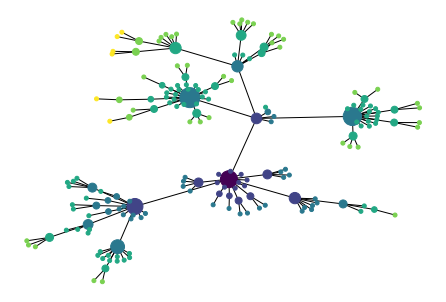

In [134]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

In [131]:
dog

Synset('dog.n.01')

### csv

Language analysis work often involves data tabulations, containing information about lexical items, or the participants in an empirical study, or the linguistic features extracted from a corpus. Here's a fragment of a simple lexicon, in CSV format:

sleep, sli:p, v.i, a condition of body and mind ...  
walk, wo:k, v.intr, progress by lifting and setting down each foot ...  
wake, weik, intrans, cease to sleep  

We can use Python's CSV library to read and write files stored in this format. For example, we can open a CSV file called `lexicon.csv` and iterate over its rows:

    import csv
    input_file = open("lexicon.csv", "rb")
    for row in csv.reader(input_file): 
        print(row)

Each row is just a list of strings. If any fields contain numerical data, they will appear as strings, and will have to be converted using `int()` or `float()`.

### NumPy

The NumPy package provides substantial support for numerical processing in Python. NumPy has a multi-dimensional array object, which is easy to initialize and access:

In [ ]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
               [[3,3,3], [4,4,4], [5,5,5]],
               [[6,6,6], [7,7,7], [8,8,8]] ])
cube[1,1,1]

In [ ]:
cube[2].transpose()

In [ ]:
cube[2,1:]

NumPy includes linear algebra functions. Here we perform singular value decomposition on a matrix, an operation used in **latent semantic analysis** to help identify implicit concepts in a document collection.

In [ ]:
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)
u

In [ ]:
s

In [ ]:
vt

NLTK's clustering package `nltk.cluster` makes extensive use of NumPy arrays, and includes support for *k*-means clustering, Gaussian EM clustering, group average agglomerative clustering, and dendrogram plots. For details, type `help(nltk.cluster)`.

### Other Python Libraries

There are many other Python libraries, and you can search for them with the help of the Python Package Index http://pypi.python.org/. Many libraries provide an interface to external software, such as relational databases (e.g. `mysql-python`) and large document collections (e.g. `PyLucene`). Many other libraries give access to file formats such as PDF, MSWord, and XML (`pypdf`, `pywin32`, `xml.etree`), RSS feeds (e.g. `feedparser`), and electronic mail (e.g. `imaplib`, `email`).

## 4.9   Summary

-    Python's assignment and parameter passing use object references; e.g. if `a` is a list and we assign `b = a`, then any operation on `a` will modify `b`, and vice versa.
-    The `is` operation tests if two objects are identical internal objects, while `==` tests if two objects are equivalent. This distinction parallels the type-token distinction.
-    Strings, lists and tuples are different kinds of sequence object, supporting common operations such as indexing, slicing, `len()`, `sorted()`, and membership testing using `in`.
-    A declarative programming style usually produces more compact, readable code; manually-incremented loop variables are usually unnecessary; when a sequence must be enumerated, use `enumerate()`.
-    Functions are an essential programming abstraction: key concepts to understand are parameter passing, variable scope, and docstrings.
-    A function serves as a namespace: names defined inside a function are not visible outside that function, unless those names are declared to be global.
-    Modules permit logically-related material to be localized in a file. A module serves as a namespace: names defined in a module — such as variables and functions — are not visible to other modules, unless those names are imported.
-    Dynamic programming is an algorithm design technique used widely in NLP that stores the results of previous computations in order to avoid unnecessary recomputation.